# Housing Price Precition

###### _DATABSE - [UCI Housing Database](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)_

#### PROBLEM TEARDOWN

**We're given dataset of house prices with some feature like numeber of barthrooms, number of bedroom e.t.c. Our task is to create a model which will predict the price for any new house by looking at the feature.**

#### FINDING THE TYPE OF MODEL 

- The model will be supervised (as feature and labels is given).
- This will be a regression task (as our output is a predicted value)
- It'll be a batch learing (as the data is static, no new data will come later).

#### SELECTING A PERFORMANCE MEASURE

- We'll use _Mean Square Error_ for measure the performance of our regression problem.

# SOLUTION

### 1. <u>DATA OBSERVATION AND ANALYSIS</u>

In [765]:
# importing library
import pandas as pd

In [766]:
housing_data = pd.read_csv("data.csv")
# print all data
print(housing_data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [767]:
# print all data info
print(housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [768]:
# print CHAS column data
print(housing_data['CHAS'])

# print CHAS column data - how many data oocur and how many times 
print(housing_data['CHAS'].value_counts())

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64
0    471
1     35
Name: CHAS, dtype: int64


In [769]:

# describe() :
# count : Count number of non-NA/null observations.
# mean (avearage) : Mean of the values.
# std : Standard deviation of the observations.
# min : Minimum of the values in the object.
# 25% : 25% value of the obervation is less than the output.
# 50% : 50% value of the obervation is less than the output.
# 75% : 75% value of the obervation is less than the output.
# max : Maximum of the values in the object.

print(housing_data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.280972   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.699170   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.209000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.619000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [770]:
# this line says that, plot must be drawn here
%matplotlib inline
# import matplotlib for plot diagram
import matplotlib.pyplot as plt
# plot histogram for all data column in housing data
# housing_data.hist(bins=50, figsize=(15, 10))

### 2. <u>TRAIN-TEST SPLITTING</u>

In [771]:
# impor numpy
import numpy as np

# create a function to split housing data in train and test set
# [N.B : this model also is available at scikit-learn, we impliment this method here for learning purpose]
def split_tarin_test(data, test_ratio):
    # if we don't use random.seed(), it will shuffle all data every time on runtime.
    # So, once in a situation, the model will learn or see the test data also, as the data is shuffling every run.
    np.random.seed(42) # this line will fix the first 80% train data and last 20% test data
    shuffled_data = np.random.permutation(len(data))
    # print(shuffled_data)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_data[:test_set_size]
    train_indices = shuffled_data[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [772]:
# print train and test rows
train_sets, test_sets = split_tarin_test(housing_data, 0.2)
# print(f"Rows in train sets : {len(train_sets)}\nRows in test sets : {len(test_sets)}")


In [773]:
# import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Here, we impliment train_test_split from sklearn, in previous we user our train_test_split function
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)
print(f"Rows in train sets : {len(train_set)}\nRows in test sets : {len(test_set)}")
housing_data['CHAS'].value_counts()

Rows in train sets : 404
Rows in test sets : 102


0    471
1     35
Name: CHAS, dtype: int64

In [774]:
# why StratifiedShuffleSplit is importent?
# After splitting data, the ratio will be train = 404 and test = 102
# If we've a important column like 'CHAS' (in housing database), 'CHAS' have two type of value 0 and 1
#  In 'CHAS' count of 0 is 441 and 1 is 35
# Now, if we split in general way and if the 'CHAS's all 0 value (which occur 471 time), go to in the train set (which size is 404),
# then the model will train only for 'CHAS' 0 value, it'll not recognize when we'll test the model with 'CHAS' data as 1
# Because, all 'CHAS' 1's data (which occur 35 time) is only in the test set and the model will give worng output

# Now, if we use StratifiedShuffleSplit, then the StratifiedShuffleSplit will make sure that, 
# the important colum's (like 'CHAS' in housing data) all diffrent value will appear in test set as well as train set also
# And then, if we test the model with 'CHAS' 0 or 1 data, it'll recognize the value and give us some accurate output

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data['CHAS']):
    start_train_set = housing_data.loc[train_index]
    start_test_set = housing_data.loc[test_index]

# Now,if we print test and train data's 'CHAS' value_counts()
# then we'll see, test data and and train data conrain both 0 and 1 value with same ratio
print(f"TRAIN 'CHAS' value :\n{start_train_set['CHAS'].value_counts()} \nTRAIN 'CHAS' ratio (376/28) : {376/28}\n")
print(f"TEST 'CHAS' value :\n{start_train_set['CHAS'].value_counts()} \nTEST 'CHAS' ratio (95/7) : {95/7}")


housing_data = start_train_set.copy()

TRAIN 'CHAS' value :
0    376
1     28
Name: CHAS, dtype: int64 
TRAIN 'CHAS' ratio (376/28) : 13.428571428571429

TEST 'CHAS' value :
0    376
1     28
Name: CHAS, dtype: int64 
TEST 'CHAS' ratio (95/7) : 13.571428571428571


### 3. <u>LOOKING FOR CO-RELATION</u>

In [775]:
# Co-relation lies between 0 to 1 
# Here, 1 = Strong positive co-relation and 
# 0 = Strong negetive co-relation
corr_matrix = housing_data.corr()

# Here, we can see the relation between 'MEDV' and other column
# if the value of RM, ZN, B, DIS, CHAS will increase then the value of the 'MEDV' will also increase [ex. if RM (number of room in house) will increase then 'MEDV'(the price of house) will increase]
# Again, if the value of AGE, RAD, CRIM, NOX, TAX etc will increase then the value of the 'MEDV' will decrease [ex. if CRIM (number of crime in area) will increase then 'MEDV'(the price of house) will decrease]

corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.673586
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [776]:
# pandas plotting 
from pandas.plotting import scatter_matrix
attribute = ['MEDV', 'RM', 'ZN', 'LSTAT']
# scatter_matrix(housing_data[attribute],figsize=(12,8))

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

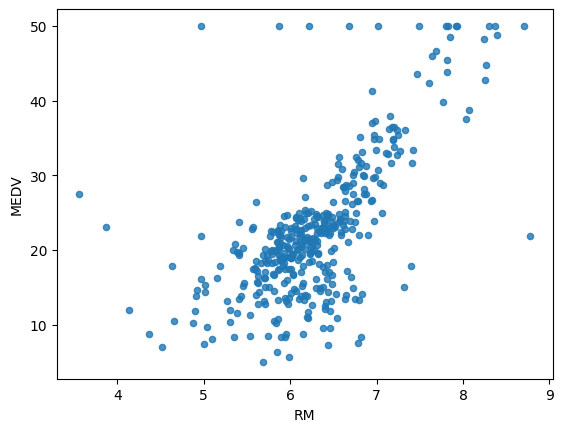

In [777]:
housing_data.plot(kind='scatter', x='RM', y='MEDV', alpha=0.8)

In [778]:
housing_data = start_train_set.drop("MEDV", axis=1)
housing_data_labels = start_train_set["MEDV"].copy()

### 4. <u>ATTRIBUTES COMBINATIONS</u>

In [779]:
# adding a new column in dataset
# housing_data['TAXRM'] = housing_data['TAX']/housing_data['RM']
# housing_data.head()

In [780]:
corr_matrix = housing_data.corr()
corr_matrix['CRIM'].sort_values(ascending=False)

CRIM       1.000000
RAD        0.648221
TAX        0.603934
LSTAT      0.471442
NOX        0.430879
INDUS      0.416640
AGE        0.361890
PTRATIO    0.305603
CHAS      -0.061482
ZN        -0.212927
RM        -0.257858
DIS       -0.386900
B         -0.486869
Name: CRIM, dtype: float64

### 4. <u>MISSING ATTRIBUTES</u>

***TO GET RID OF MISSING ATRIBUTE:***
- _Get rid of missing data points_
- _Get rid of the whole attribute_
- _Set the value to some other value (0/mean/median)_

In [781]:
# Option 1
# The original dataset will reamin unchanged
# delete whole row which contain null value in RM column
housing_data.dropna(subset="RM").shape

(400, 13)

In [782]:
# Option 2
# The original dataset will reamin unchanged
# delete whole RM column
housing_data.drop("RM", axis=1).shape

(404, 12)

In [783]:
# Option 3
# The original dataset will reamin unchanged
# Calculate median of RM column
median = housing_data['RM'].median()
# fillna fill with median value where it finds null
housing_data["RM"].fillna(median)
housing_data.shape

(404, 13)

In [784]:
# Option 3 with sklearn with more efficient way
# Efficient way means, in above we, calculate meidan only for RM
# But we've to calculate medians for all column, because any column can have null values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(housing_data)
imputer.statistics_


array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21350e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [785]:
x = imputer.transform(housing_data)
housing_data_tr = pd.DataFrame(x, columns=housing_data.columns)
housing_data_tr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
1,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
2,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
3,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
4,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15


### 5. <u>Sci-kit Learn Design</u>
***Three types of objects:***
- _Estimators : It estimate some parameters based on dataset. ex. imputer. It has a fit method and transform method_
    - _Fit Method : Fit the dataset and calculate parameters_
<br>
<br>
- _Transformers : It takes input and returtn output based on the learnings from fit. It also has a convinience function called fit_transform() which fits and then transform_
<br>
<br>
- _Predictors : LinearRegression model is an example of predictors. fit() and predict() are two common function. It also gives score function which evaluate the prediction_

### 6. <u>Feature Scaling</u>

***Two types of feature scaling method:***
- _Min-Max Scaling (Normalization) : (value - min) / (max - min), Sklearn provide a class called MinMaxScaler_
<br>
<br>
- _Standardization : (value - mean) / std, Sklearn provide a class called StandardScaler_

### 7. <u>Creating Pipeline</u>

In [786]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    # ... add as many as you want in your pipeline
    ("std_scaler", StandardScaler()),
])
housing_data_num_tr = my_pipeline.fit_transform(housing_data)
housing_data_num_tr.shape

(404, 13)

### 8. <u>Selecting a desired model</u>

In [787]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_data_num_tr, housing_data_labels)
some_data = housing_data.iloc[:5]
some_labels = housing_data_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
predicted_value = model.predict(prepared_data)

print(list(some_labels))
print(predicted_value)

[21.9, 24.5, 16.7, 23.1, 23.0]
[22.552 25.388 16.401 23.351 23.296]


In [788]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_data_num_tr)
mse = mean_squared_error(housing_data_labels, housing_predictions)
mse = np.sqrt(mse)
print(f"Error : {mse}")

Error : 1.1964079695918823


### 8. <u>Cross validation (using better evaluation technique)</u>

In [789]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, housing_data_num_tr, housing_data_labels, scoring="neg_mean_squared_error", cv=10)
rmse_score = np.sqrt(-score)

In [790]:
def printScores(scores):
    print(f"Scores:{scores}\nMean:{scores.mean()}\nStandard Deviation:{scores.std()}")

printScores(rmse_score)

Scores:[2.90198178 2.68973057 4.62383102 2.50227976 3.0845873  2.70801925
 6.08312519 3.4111887  2.99715284 3.37784875]
Mean:3.4379745160309705
Standard Deviation:1.0479567354512833


# OUTPUTS

| Model Name 	| Outputs 	|
|---	|---	|
| LinearRegression       | Mean : 4.37801551473031<br>Standard Deviation : 1.281584814375142 |
| DecisionTreeRegressor  | Mean : 4.495726397074142<br>Standard Deviation : 0.9062161437737262 |
| RandomForestRegressior | Mean : 3.4471855817821457<br>Standard Deviation : 1.0154749998710177 |

### Convert this notebook into a python file and run the pipeline using VS Code

### Saving the model

In [791]:
from joblib import dump, load
dump(model, "Housing.joblib")

['Housing.joblib']

### Testing the model

In [793]:
x_test = start_test_set.drop("MEDV", axis=1)
y_test = start_test_set["MEDV"].copy()

x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
printScores(final_rmse)

Scores:3.142475833279406
Mean:3.142475833279406
Standard Deviation:0.0


### Model Usage

In [796]:
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747, -0.74008849, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])

print(f"Output = {model.predict(features)}")

Output = [21.055]
